In [18]:
from PIL import Image as pilImage #png
from PIL.ExifTags import TAGS
from IPython.display import Image, display
import pytesseract as pytess

import fitz #PDF
import datetime
import re

from docx2pdf import convert #DOCX

import os.path, time #Metadata

from contexto import limpieza, exploracion # Limpieza
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer  #BOW
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# PNG

In [2]:
def resize(png):
    """
    Se escala imagen a 200*200 px
    """
    resize_png = png.resize((200, 200))
    display(resize_png)
    
def png_data(png, path):
    """
    Se imprime directorio de metadata por atributos objeto png y funcionalidades dependientes del sistema operativo
    """
    info_dict = {
    'Nombre archivo': png.filename,
    'Autor': os.stat(path).st_uid,
    'Formato': png.format,
    'Fecha creación': time.ctime(os.path.getctime(path)), 
    'Fecha modificación': time.ctime(os.path.getmtime(path))
    }

    for label,value in info_dict.items():
        print(f"{label}: {value}")

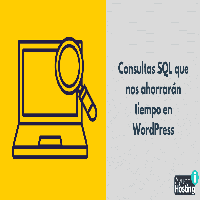

Nombre archivo: .\Files\image_01.png
Autor: 0
Formato: PNG
Fecha creación: Wed Apr 27 08:43:35 2022
Fecha modificación: Wed Apr 27 09:02:13 2022

 -------------------------------------------------- 

Consultas SQL que
nos ahorrarán
tiempo en
WordPress

ete] ¡
Hosting



 -------------------------------------------------- 



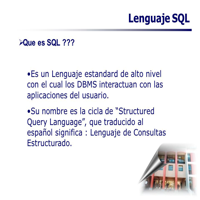

Nombre archivo: .\Files\image_02.png
Autor: 0
Formato: PNG
Fecha creación: Wed Apr 27 08:43:35 2022
Fecha modificación: Tue Apr 26 18:06:10 2022

 -------------------------------------------------- 

Lenguaje SQL

>Que es SQL 2???

*Es un Lenguaje estandard de alto nivel
con el cual los DBMS interactuan con las
aplicaciones del usuario.

*Su nombre es la cicla de “Structured
Query Language”, que traducido al
español significa : Lenguaje de Consul

 -------------------------------------------------- 



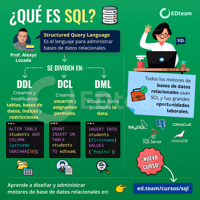

Nombre archivo: .\Files\image_03.png
Autor: 0
Formato: PNG
Fecha creación: Wed Apr 27 08:43:35 2022
Fecha modificación: Tue Apr 26 18:06:03 2022

 -------------------------------------------------- 

Prof. Alexys ]

Lozada v
A SE DIVIDEN EN: =------,
NY NA
Cream Creamos Inserta,
modificamos usuariosy actualiza, borra
tablas, e de EEES y consulta la
datos, índices y permisos. EJE

restricciones.

Mys AN ORACLE
e A

SOL Server MariaDB

Aprende a di

 -------------------------------------------------- 



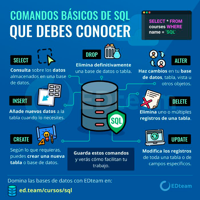

Nombre archivo: .\Files\image_04.png
Autor: 0
Formato: PNG
Fecha creación: Wed Apr 27 08:43:35 2022
Fecha modificación: Tue Apr 26 18:05:57 2022

 -------------------------------------------------- 

COMANDOS BÁSICOS DE SQL
QUE DEBES CONOCER

E mía
ELIAS

DÓ Elimina definitivamente
Consulta sobre los datos na base de datos o tabla. — Haz cambios en tu base

almacenados en una base O COLE ENERSC

RES E: otros objetos.
== LES 53

Añade nuevos datos

 -------------------------------------------------- 



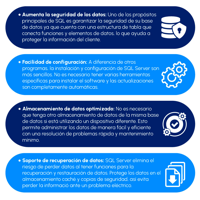

Nombre archivo: .\Files\image_05.png
Autor: 0
Formato: PNG
Fecha creación: Wed Apr 27 08:43:35 2022
Fecha modificación: Tue Apr 26 18:05:47 2022

 -------------------------------------------------- 

+ Aumenta la seguridad de los datos: Uno de los propósitos
principales de SQL es garantizar la seguridad de su base LL]
de datos ya que cuenta con una estructura de tabla que ura
conecta funciones y elementos de datos, lo que ayuda al A
proteger la i

 -------------------------------------------------- 



In [3]:
# Se inicializan listas para textos y vectores de palabras.
list_dirty_text = []
list_clean_text = []
word_vectors = []

for i in range(1, 6):
    path = f'.\Files\image_0{i}.png'
    png = pilImage.open(path)
    resize(png)
    png_data(png, path)
    print('\n -------------------------------------------------- \n')
    text = pytess.image_to_string(png, lang="spa") # Extracción de texto
    list_dirty_text.append(text)
    print(text[:250])
    print('\n -------------------------------------------------- \n')
    
    # Limpieza
    clean_text = limpieza.limpieza_basica(text)
    clean_text = limpieza.remover_acentos(clean_text)
    clean_text = limpieza.remover_palabras_cortas(clean_text, 3)
    list_clean_text.append(clean_text)
    # Vector de palabras
    token = exploracion.obtener_ngramas(clean_text)
    word_vectors.append(token)

# PDF

In [4]:
def pdf_data(pdf, path):
    # Metadata proporcionada por PyMuPDF y OS
    try:
        create_date = datetime.datetime.strptime(re.findall(r'\:(.+?)\+',pdf.metadata['creationDate'])[0],'%Y%m%d%H%M%S')
    except:
        create_date = time.ctime(os.path.getctime(path))
    
    info_dict = {
        'Nombre archivo': os.path.basename(path),
        'Título': pdf.metadata['title'],
        'Autor': pdf.metadata['author'],
        'Formato': pdf.metadata['format'],
        'Fecha creación': create_date, 
        'Fecha modificación': time.ctime(os.path.getmtime(path))
        }

    for label,value in info_dict.items():
        print(f"{label}: {value}")

In [5]:
for i in range(1, 6):
    path = f'.\Files\pdf_0{i}.pdf'
    pdf = fitz.open(path) # Módulo fitz
    pdf_data(pdf, path)
    print('\n -------------------------------------------------- \n')
    with pdf as doc: # Extracción de texto
        text = ""
        for page in doc:
            text += page.get_text()
    list_dirty_text.append(text)
    print(text[:250])
    print('\n -------------------------------------------------- \n')
    
    # Limpieza
    clean_text = limpieza.limpieza_basica(text)
    clean_text = limpieza.remover_acentos(clean_text)
    clean_text = limpieza.remover_palabras_cortas(clean_text, 3)
    list_clean_text.append(clean_text)
    # Vector de palabras
    token = exploracion.obtener_ngramas(clean_text)
    word_vectors.append(token)

Nombre archivo: pdf_01.pdf
Título: Microsoft SQL Server
Autor: BICHO-HP
Formato: PDF 1.4
Fecha creación: 2008-02-08 20:21:06
Fecha modificación: Tue Apr 26 15:42:41 2022

 -------------------------------------------------- 

SQL SERVER VS MySQL
Autores: Jose Santamaría y Javier Hernández
Microsoft SQL Server
Microsoft SQL Server es un sistema de gestión de base de datos relacional (RDBMS) 
producido por Microsoft. Su principal lenguaje de consulta es Transact-SQL, una 
a

 -------------------------------------------------- 

Nombre archivo: pdf_02.pdf
Título: Manual Prctico de SQL
Autor: Brothers
Formato: PDF 1.5
Fecha creación: Wed Apr 27 08:43:35 2022
Fecha modificación: Tue Apr 26 15:42:47 2022

 -------------------------------------------------- 

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Manual Práctico de SQL 
ORIENTADO A SQL 7.0   
Preparado por: 
Alvaro E. García 
alvaroegarcia@ubbi.com 
Manual Práctico de SQL  
Preparado por: Alvaro E. García 
 
 
 
ÍNDICE 
 
INTRODUCCIÓN  
 
 
 
 


# DOCX

In [6]:
for i in range(1, 6):
    convert(f'.\Files\docx_0{i}.docx', f'.\Files\docx_0{i}.pdf') # Conversión de DOCX a PDF
    path = f'.\Files\docx_0{i}.pdf'
    pdf = fitz.open(path)
    pdf_data(pdf, path)
    print('\n -------------------------------------------------- \n')
    with pdf as doc:
        text = ""
        for page in doc:
            text += page.get_text()
    list_dirty_text.append(text)
    print(text[:250])
    print('\n -------------------------------------------------- \n')
    
    clean_text = limpieza.limpieza_basica(text)
    clean_text = limpieza.remover_acentos(clean_text)
    clean_text = limpieza.remover_palabras_cortas(clean_text, 3)
    list_clean_text.append(clean_text)
    token = exploracion.obtener_ngramas(clean_text)
    word_vectors.append(token)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.43s/it]


Nombre archivo: docx_01.pdf
Título: TÍTULO LARGO
Autor: Ulises Odiseo
Formato: PDF 1.7
Fecha creación: Thu Apr 28 16:00:15 2022
Fecha modificación: Thu Apr 28 20:56:55 2022

 -------------------------------------------------- 

JOURNAL OF SCIENCE AND RESEARCH 
E-ISSN: 2528-8083 
Revista Ciencia e Investigación 
Vol. 5, N°. 1, enero - marzo 2020 
29 
 
 
LA TRANSICIÓN DEL MANEJO DE BASES DE DATOS 
ENTRE EL MODELO SQL AL NOSQL EN LA ENSEÑANZA 
DE CARRERAS DE TECNOLÓGICAS 
THE

 -------------------------------------------------- 



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.85s/it]


Nombre archivo: docx_02.pdf
Título: 
Autor: 
Formato: PDF 1.7
Fecha creación: Thu Apr 28 16:00:24 2022
Fecha modificación: Thu Apr 28 20:57:04 2022

 -------------------------------------------------- 

93 
 
Desarrollo de un agente conversacional para el 
aprendizaje de SQL 
Development of a chatbot for learning SQL 
 
Antonio Balderas 
Departamento de Ingenier´ıa 
Informa´tica, Universidad de Ca´diz 
Puerto Real, Spain 
antonio.balderas@uca.es 
Ta

 -------------------------------------------------- 



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.19s/it]


Nombre archivo: docx_03.pdf
Título: 
Autor: 
Formato: PDF 1.7
Fecha creación: Thu Apr 28 16:00:32 2022
Fecha modificación: Thu Apr 28 20:57:11 2022

 -------------------------------------------------- 

 
Accelerating the world's research. 
 
 
 
 
 
Introdución al SQL 
eduard iglesias torres 
Related papers 
Download a PDF Pack of the best related papers  
Todo SQL 
Andrés Valentin Vera Chávez 
Manual de Iniciación a Oracle Conceptos para el Estudi

 -------------------------------------------------- 



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.64s/it]


Nombre archivo: docx_04.pdf
Título: 
Autor: 
Formato: PDF 1.7
Fecha creación: Thu Apr 28 16:00:37 2022
Fecha modificación: Thu Apr 28 20:57:15 2022

 -------------------------------------------------- 

PROTECCIÓN ANTE ATAQUES DE INYECCIÓN SQL EN 
APLICACIONES WEB 
Manuel Alberto López Soto1, Ana María Delgado Burgueño2, Manuel Iván Tostado 
Ramírez3, Juan Francisco Peraza Garzón4 
1,2,3,4 Facultad De Informática Mazatlán, Universidad Autónoma de Si

 -------------------------------------------------- 



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.83s/it]

Nombre archivo: docx_05.pdf
Título: Redalyc.ANACON: ANALIZADOR DE CONSULTAS SQL
Autor: Garrido, Piedad; Martínez, Francisco; Tramullas, Jesús; Fuertes, Gabriel
Formato: PDF 1.7
Fecha creación: Thu Apr 28 16:00:43 2022
Fecha modificación: Thu Apr 28 20:57:20 2022

 -------------------------------------------------- 

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
RIED. Revista Iberoamericana de Educación a 
Distancia 
ISSN: 1138-2783 
ried@edu.uned.es 
Asociación Iberoamericana de Educación 
Superior a Distancia 
Organismo Internacional 
 
 
 
 
 
 
 
 


 -------------------------------------------------- 



# Limpieza

In [7]:
# Longitud lista de vectores de palabras
len(word_vectors)

15

In [8]:
for i in word_vectors:
    print(i)
    print('\n -------------------------------------------------- \n')

['consultas', 'sql', 'que', 'nos', 'ahorraran', 'tiempo', 'wordpress', 'ete', 'hosting']

 -------------------------------------------------- 

['lenguaje', 'sql', 'que', 'sql', 'lenguaje', 'estandard', 'alto', 'nivel', 'con', 'cual', 'los', 'dbms', 'interactuan', 'con', 'las', 'aplicaciones', 'del', 'usuario', 'nombre', 'cicla', 'structured', 'query', 'language', 'que', 'traducido', 'espanol', 'significa', 'lenguaje', 'consultas', 'estructurado']

 -------------------------------------------------- 

['prof', 'alexys', 'lozada', 'dividen', 'cream', 'creamos', 'inserta', 'modificamos', 'usuariosy', 'actualiza', 'borra', 'tablas', 'eees', 'consulta', 'datos', 'indices', 'permisos', 'eje', 'restricciones', 'mys', 'oracle', 'sol', 'server', 'mariadb', 'aprende', 'disenar', 'administrar', 'motores', 'base', 'datos', 'relacionales']

 -------------------------------------------------- 

['comandos', 'basicos', 'sql', 'que', 'debes', 'conocer', 'mia', 'elias', 'elimina', 'definitivamente', '

In [9]:
# Dataframe para comparar texto limpio y sucio
df = pd.DataFrame(list(zip(list_clean_text, map(lambda x: x.replace('\n',''), list_dirty_text))),
               columns =['Clean', 'Dirty'])

pd.set_option('max_colwidth', 1000)
df

,Clean,Dirty
0,consultas sql que nos ahorraran tiempo wordpress ete hosting,Consultas SQL quenos ahorrarántiempo enWordPressete] ¡Hosting
1,lenguaje sql que sql lenguaje estandard alto nivel con cual los dbms interactuan con las aplicaciones del usuario nombre cicla structured query language que traducido espanol significa lenguaje consultas estructurado,"Lenguaje SQL>Que es SQL 2???*Es un Lenguaje estandard de alto nivelcon el cual los DBMS interactuan con lasaplicaciones del usuario.*Su nombre es la cicla de “StructuredQuery Language”, que traducido alespañol significa : Lenguaje de ConsultasEstructurado."
2,prof alexys lozada dividen cream creamos inserta modificamos usuariosy actualiza borra tablas eees consulta datos indices permisos eje restricciones mys oracle sol server mariadb aprende disenar administrar motores base datos relacionales,"Prof. Alexys ]Lozada vA SE DIVIDEN EN: =------,NY NACream Creamos Inserta,modificamos usuariosy actualiza, borratablas, e de EEES y consulta ladatos, índices y permisos. EJErestricciones.Mys AN ORACLEe ASOL Server MariaDBAprende a diseñar y administrarmotores de base de datos relacionales en:"
3,comandos basicos sql que debes conocer mia elias elimina definitivamente consulta sobre los datos base datos tabla haz cambios base almacenados una base cole enersc res otros objetos les anade nuevos datos registros una tabla eas modifica los registros toda una tabla campos especificos segun que requieras puedes crear una nueva estres domina las bases datos con edteam jedteam team cursos sql,"COMANDOS BÁSICOS DE SQLQUE DEBES CONOCERE míaELIASDÓ Elimina definitivamenteConsulta sobre los datos na base de datos o tabla. — Haz cambios en tu basealmacenados en una base O COLE ENERSCRES E: otros objetos.== LES 53Añade nuevos datos a laregistros de una tabla.EASModifica los registrosde toda una tabla o decampos específicos.Según lo que requieras,puedes crear una nuevaESTRESDomina las bases de datos con EDteam en:( JEDteamed.team/cursos/sql"
4,aumenta seguridad los datos uno los propositos principales sql garantizar seguridad base datos que cuenta con una estructura tabla que ura conecta funciones elementos datos que ayuda proteger informacion del cliente mas sencillos necesario tener varias herramientas especificas para instalar software las actualizaciones son completamente automaticas facilidad configuracion diferencia otros programas instalacion configuracion sql server son almacenamiento datos optimizado necesario que tenga otro almacenamiento datos misma base datos esta utilizando dispositivo diferente esto permite administrar los datos manera facil eficiente con una resolucion problemas rapida mantenimiento minimo soporte recuperacion datos sql server elimina riesgo perder datos tener funciones para recuperacion restauracion datos protege los datos almacenamiento cache copias seguridad asi evita perder informacio ante problema electrico,"+ Aumenta la seguridad de los datos: Uno de los propósitosprincipales de SQL es garantizar la seguridad de su base LL]de datos ya que cuenta con una estructura de tabla que uraconecta funciones y elementos de datos, lo que ayuda al Aproteger la información del cliente.más sencillos. No es necesario tener varias herramientasespecíficas para instalar el software y las actualizacionesson completamente automáticas.Facilidad de configuración: A diferencia de otrosprogramas, la instalación y configuración de SQL Server son 0»Almacenamiento de datos optimizado: No es necesarioque tenga otro almacenamiento de datos de la misma base (5)de datos si está utilizando un dispositivo diferente. Estopermite administrar los datos de manera fácil y eficiente O)con una resolución de problemas rápida y mantenimiento Qmínimo.Soporte de recuperación de datos: SQL Server elimina elriesgo de perder datos al tener funciones para larecuperación y restauración de datos. Protege los datos en elalmacenamiento ..."
5,sql server mysql autores jose santamaria javier hernandez microsoft sql ser

# BOW

In [10]:
# Cargue de stop words
with open('stop_words_spanish.txt', 'r', encoding='utf-8') as f:
    stopwords = [limpieza.remover_acentos(line.strip()) for line in f]

In [12]:
vectorizer = CountVectorizer(stop_words=stopwords) # Inicialización de BoW
X = vectorizer.fit_transform(list_clean_text) # Ajuste modelo y vectorización de texto
df_bow_sql = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()) # Visualización
df_bow_sql.head()

,aaa,aab,aabello,aba,abalanzarse,abandonando,abandonaron,abandono,abandonos,abarcar,...,yyy,yyyy,zacion,zadorozhny,zar,zaragoza,zenodo,zhou,zodb,zona
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
sum_bow_sql = X.sum(axis=0)
df_sum_bow = pd.DataFrame(sum_bow_sql, columns=vectorizer.get_feature_names_out()) # Visualización frecuencia
df_sum_bow

,aaa,aab,aabello,aba,abalanzarse,abandonando,abandonaron,abandono,abandonos,abarcar,...,yyy,yyyy,zacion,zadorozhny,zar,zaragoza,zenodo,zhou,zodb,zona
0,3,1,1,2,1,1,2,1,1,1,...,4,2,1,1,1,7,1,1,1,1


In [14]:
sql_words_freq = [(word, sum_bow_sql[0, idx]) for word, idx in vectorizer.vocabulary_.items()] # Lista de tuplas con frecuencias de palabras

sorted_sql_words_freq = dict(sorted(sql_words_freq, key=lambda x: x[1], reverse=True)[:100]) # Diccionario top 100 ordenado
print(sorted_sql_words_freq)

{'datos': 599, 'sql': 470, 'tabla': 333, 'select': 249, 'from': 213, 'nombre': 199, 'bases': 177, 'consulta': 165, 'base': 163, 'tablas': 142, 'where': 122, 'consultas': 120, 'columnas': 105, 'tipo': 104, 'registros': 96, 'informacion': 96, 'and': 92, 'columna': 90, 'valores': 90, 'clausula': 89, 'null': 88, 'sentencia': 83, 'emp': 83, 'forma': 80, 'lenguaje': 78, 'filas': 73, 'campo': 73, 'cliente': 72, 'not': 70, 'sqlplus': 69, 'campos': 66, 'observatorios': 63, 'numero': 62, 'table': 62, 'resultado': 59, 'the': 59, 'dep': 58, 'modelo': 57, 'usuario': 56, 'comandos': 56, 'caso': 55, 'sistemas': 54, 'resultados': 54, 'relacional': 52, 'http': 52, 'create': 50, 'sentencias': 50, 'utilizar': 50, 'ejercicios': 47, 'www': 47, 'clima': 47, 'tipos': 46, 'web': 46, 'funciones': 45, 'permite': 45, 'herramienta': 45, 'oficio': 45, 'objetos': 44, 'administracion': 44, 'devuelve': 44, 'garcia': 43, 'numcli': 43, 'estudiantes': 43, 'ejercicio': 43, 'dual': 43, 'pagina': 42, 'relacionales': 41, 'a

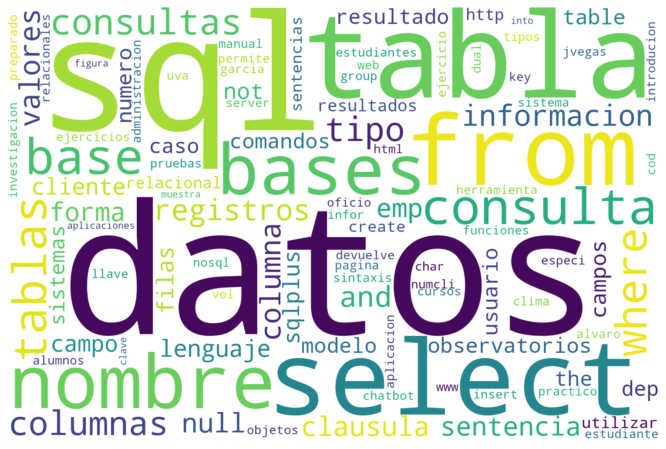

In [15]:
# Nube de palabras con diccionario de frecuencias
wordcloud = WordCloud(background_color='white', width=1500, height=1000).generate_from_frequencies(sorted_sql_words_freq)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Tests

In [36]:
#os.stat(".\Files\image_01.png").st_uid

#from os import stat
from pwd import getpwuid
getpwuid(os.stat(".\Files\image_01.png").st_uid).pw_name

ModuleNotFoundError: No module named 'pwd'

In [39]:
import ctypes as ctypes
from ctypes import wintypes as wintypes

kernel32 = ctypes.WinDLL('kernel32', use_last_error=True)
advapi32 = ctypes.WinDLL('advapi32', use_last_error=True)

ERROR_INVALID_FUNCTION  = 0x0001
ERROR_FILE_NOT_FOUND    = 0x0002
ERROR_PATH_NOT_FOUND    = 0x0003
ERROR_ACCESS_DENIED     = 0x0005
ERROR_SHARING_VIOLATION = 0x0020

SE_FILE_OBJECT = 1
OWNER_SECURITY_INFORMATION = 0x00000001
GROUP_SECURITY_INFORMATION = 0x00000002
DACL_SECURITY_INFORMATION  = 0x00000004
SACL_SECURITY_INFORMATION  = 0x00000008
LABEL_SECURITY_INFORMATION = 0x00000010

_DEFAULT_SECURITY_INFORMATION = (OWNER_SECURITY_INFORMATION |
    GROUP_SECURITY_INFORMATION | DACL_SECURITY_INFORMATION |
    LABEL_SECURITY_INFORMATION)

LPDWORD = ctypes.POINTER(wintypes.DWORD)
SE_OBJECT_TYPE = wintypes.DWORD
SECURITY_INFORMATION = wintypes.DWORD

class SID_NAME_USE(wintypes.DWORD):
    _sid_types = dict(enumerate('''
        User Group Domain Alias WellKnownGroup DeletedAccount
        Invalid Unknown Computer Label'''.split(), 1))

    def __init__(self, value=None):
        if value is not None:
            if value not in self.sid_types:
                raise ValueError('invalid SID type')
            wintypes.DWORD.__init__(value)

    def __str__(self):
        if self.value not in self._sid_types:
            raise ValueError('invalid SID type')
        return self._sid_types[self.value]

    def __repr__(self):
        return 'SID_NAME_USE(%s)' % self.value

PSID_NAME_USE = ctypes.POINTER(SID_NAME_USE)

class PLOCAL(wintypes.LPVOID):
    _needs_free = False
    def __init__(self, value=None, needs_free=False):
        super(PLOCAL, self).__init__(value)
        self._needs_free = needs_free

    def __del__(self):
        if self and self._needs_free:
            kernel32.LocalFree(self)
            self._needs_free = False

PACL = PLOCAL

class PSID(PLOCAL):
    def __init__(self, value=None, needs_free=False):
        super(PSID, self).__init__(value, needs_free)

    def __str__(self):
        if not self:
            raise ValueError('NULL pointer access')
        sid = wintypes.LPWSTR()
        advapi32.ConvertSidToStringSidW(self, ctypes.byref(sid))
        try:
            return sid.value
        finally:
            if sid:
                kernel32.LocalFree(sid)

class PSECURITY_DESCRIPTOR(PLOCAL):
    def __init__(self, value=None, needs_free=False):
        super(PSECURITY_DESCRIPTOR, self).__init__(value, needs_free)
        self.pOwner = PSID()
        self.pGroup = PSID()
        self.pDacl = PACL()
        self.pSacl = PACL()
        # back references to keep this object alive
        self.pOwner._SD = self
        self.pGroup._SD = self
        self.pDacl._SD = self
        self.pSacl._SD = self

    def get_owner(self, system_name=None):
        if not self or not self.pOwner:
            raise ValueError('NULL pointer access')
        return look_up_account_sid(self.pOwner, system_name)

    def get_group(self, system_name=None):
        if not self or not self.pGroup:
            raise ValueError('NULL pointer access')
        return look_up_account_sid(self.pGroup, system_name)

def _check_bool(result, func, args):
    if not result:
        raise ctypes.WinError(ctypes.get_last_error())
    return args

# msdn.microsoft.com/en-us/library/aa376399
advapi32.ConvertSidToStringSidW.errcheck = _check_bool
advapi32.ConvertSidToStringSidW.argtypes = (
    PSID, # _In_   Sid
    ctypes.POINTER(wintypes.LPWSTR)) # _Out_ StringSid

# msdn.microsoft.com/en-us/library/aa379166
advapi32.LookupAccountSidW.errcheck = _check_bool
advapi32.LookupAccountSidW.argtypes = (
    wintypes.LPCWSTR, # _In_opt_  lpSystemName
    PSID,             # _In_      lpSid
    wintypes.LPCWSTR, # _Out_opt_ lpName
    LPDWORD,          # _Inout_   cchName
    wintypes.LPCWSTR, # _Out_opt_ lpReferencedDomainName
    LPDWORD,          # _Inout_   cchReferencedDomainName
    PSID_NAME_USE)    # _Out_     peUse

# msdn.microsoft.com/en-us/library/aa446645
advapi32.GetNamedSecurityInfoW.restype = wintypes.DWORD
advapi32.GetNamedSecurityInfoW.argtypes = (
    wintypes.LPWSTR,       # _In_      pObjectName
    SE_OBJECT_TYPE,        # _In_      ObjectType
    SECURITY_INFORMATION,  # _In_      SecurityInfo
    ctypes.POINTER(PSID),  # _Out_opt_ ppsidOwner
    ctypes.POINTER(PSID),  # _Out_opt_ ppsidGroup
    ctypes.POINTER(PACL),  # _Out_opt_ ppDacl
    ctypes.POINTER(PACL),  # _Out_opt_ ppSacl
    ctypes.POINTER(PSECURITY_DESCRIPTOR)) # _Out_opt_ ppSecurityDescriptor


In [41]:
import os, sys

def look_up_account_sid(sid, system_name=None):
    SIZE = 256
    name = ctypes.create_unicode_buffer(SIZE)
    domain = ctypes.create_unicode_buffer(SIZE)
    cch_name = wintypes.DWORD(SIZE)
    cch_domain = wintypes.DWORD(SIZE)
    sid_type = SID_NAME_USE()
    advapi32.LookupAccountSidW(system_name, sid, name, ctypes.byref(cch_name),
        domain, ctypes.byref(cch_domain), ctypes.byref(sid_type))
    return name.value, domain.value, sid_type

def get_file_security(filename, request=_DEFAULT_SECURITY_INFORMATION):
    # N.B. This query may fail with ERROR_INVALID_FUNCTION
    # for some filesystems.
    pSD = PSECURITY_DESCRIPTOR(needs_free=True)
    error = advapi32.GetNamedSecurityInfoW(filename, SE_FILE_OBJECT, request,
                ctypes.byref(pSD.pOwner), ctypes.byref(pSD.pGroup),
                ctypes.byref(pSD.pDacl), ctypes.byref(pSD.pSacl),
                ctypes.byref(pSD))
    if error != 0:
        raise ctypes.WinError(error)
    return pSD

filename = ".\Files\image_01.png"
pSD = get_file_security(filename)
owner_name, owner_domain, owner_sid_type = pSD.get_owner()
if owner_domain:
    owner_name = '{}\\{}'.format(owner_domain, owner_name)

print("Path : {}".format(filename))
print("Owner: {} ({})".format(owner_name, owner_sid_type))
print("SID  : {}".format(pSD.pOwner))

Path : .\Files\image_01.png
Owner: LAPTOP-6K5N57F0\camil (User)
SID  : S-1-5-21-2876396753-2895441981-3450024942-1001


In [34]:
import os.path, time
print("Last modified: %s" % time.ctime(os.path.getmtime(".\Files\image_01.png")))
print("Created: %s" % time.ctime(os.path.getctime(".\Files\image_01.png")))

Last modified: Wed Apr 27 09:02:13 2022
Created: Wed Apr 27 08:43:35 2022


In [48]:
exifdata = png.getexif()
for tag_id in exifdata:
    # get the tag name, instead of human unreadable tag id
    tag = TAGS.get(tag_id, tag_id)
    data = exifdata.get(tag_id)
    # decode bytes 
    if isinstance(data, bytes):
        data = data.decode()
    print(f"{tag:25}: {data}")

In [54]:
if exifdata == {}:
    print(exifdata)
else:
    print('no')

{}


In [26]:
from contexto import vectorizacion
import numpy
import sys
numpy.set_printoptions(threshold=sys.maxsize)

bow = vectorizacion.VectorizadorFrecuencias()
bow.ajustar(token)
bow.vectorizar(token)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [24]:
from contexto import vectorizacion

bow = vectorizacion.VectorizadorFrecuencias()
bow.ajustar(token)

llaves = ['bow']
vectores = {}
for i, v in enumerate([bow]):
        vectores[llaves[i]] = v.vectorizar(token)
        
vectores

{'bow': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)}

In [10]:
docx = lectura.Lector(r'.\Files\docx_01.docx')

In [11]:
text = docx.leer_word()
print(text)

JOURNAL OF SCIENCE AND RESEARCH

E-ISSN: 2528-8083

LA TRANSICIÓN DEL MANEJO DE BASES DE DATOS ENTRE EL MODELO SQL AL NOSQL EN LA ENSEÑANZA DE CARRERAS DE TECNOLÓGICAS

THE DATABASE MANAGEMENT TRANSITION BETWEEN THE SQL TO NOSQL MODEL IN TEACHING OF TECHNOLOGICAL CAREERS



https://doi.org/10.5281/zenodo.3598497

AUTORES: Harry Saltos Viteri1*

Miguel Franco Bayas2

DIRECCIÓN PARA CORRESPONDENCIA: hsaltos@utb.edu.ec

Fecha de recepción: 08 / 10 / 2019

Fecha de aceptación: 10 / 12 / 2019





RESUMEN

La familiaridad con las bases de datos durante largo tiempo ha dejado establecido un modelo relacional como el más adecuado, ya que este ha dado resultados por mucho tiempo, y logró una maduración y consistencia que le ha permitido sobre todo la confianza de varias generaciones de desarrolladores, con este modelo se ha utilizado la tecnología SQL, con su lógica sencilla y estructurada; además, el análisis permitió determinar que la tendencia en la formación de estudiantes de ingeniería en

In [57]:
import docx

def getMetaData(doc):
    metadata = {}
    prop = doc.core_properties
    metadata["author"] = prop.author
    metadata["category"] = prop.category
    metadata["comments"] = prop.comments
    metadata["content_status"] = prop.content_status
    metadata["created"] = prop.created
    metadata["identifier"] = prop.identifier
    metadata["keywords"] = prop.keywords
    metadata["last_modified_by"] = prop.last_modified_by
    metadata["language"] = prop.language
    metadata["modified"] = prop.modified
    metadata["subject"] = prop.subject
    metadata["title"] = prop.title
    metadata["version"] = prop.version
    return metadata

doc = docx.Document(r'.\Files\docx_01.docx')
metadata_dict = getMetaData(doc)
metadata_dict

{'author': 'Ulises Odiseo',
 'category': '',
 'comments': '',
 'content_status': '',
 'created': datetime.datetime(2022, 4, 26, 21, 44, 12),
 'identifier': '',
 'keywords': '',
 'last_modified_by': '',
 'language': '',
 'modified': datetime.datetime(2022, 4, 26, 21, 44, 12),
 'subject': '',
 'title': 'TÍTULO LARGO',
 'version': ''}

In [12]:
from typing import List, Any, Callable, Tuple, Union

Token = str
TokenList = List[Token]

In [13]:
whitespace = re.compile('\s+')
end_sentence = re.compile('[.!?]\s+')

def tokenize(s:str) -> TokenList:
    '''Split a string into tokens'''
    return whitespace.split(s)

def untokenize(ts:TokenList) -> str:
    '''Join a list of tokens into a string'''
    return ' '.join(ts)

def sentencize(s:str) -> TokenList:
    '''Split a string into a list of sentences'''
    return end_sentence.split(s)

def unsentencise(ts:TokenList) -> str:
    '''Join a list of sentences into a string'''
    return '. '.join(ts)

def html_unsentencise(ts:TokenList) -> str:
    '''Joing a list of sentences into HTML for display'''
    return ''.join(f'<p>{t}</p>' for t in ts)

In [34]:
def mark_text(text:str) -> str:
    return f'<span style="color: red;">{text}</span>'
    
#def mark_span(text:TokenList) -> TokenList:
#    return [mark_text(token) for token in text]

def mark_span(text:TokenList) -> TokenList:
    if len(text) > 0:
        text[0] = '<span style="background: #69E2FB;">' + text[0]
        text[-1] += '</span>'
    return text

In [16]:
def markup_diff(a:TokenList, b:TokenList,
                mark:Callable[TokenList, TokenList]=mark_span,
                default_mark: Callable[TokenList, TokenList] = lambda x: x,
                isjunk:Union[None, Callable[[Token], bool]]=None) -> Tuple[TokenList, TokenList]:
    """Returns a and b with any differences processed by mark

    Junk is ignored by the differ
    """
    seqmatcher = difflib.SequenceMatcher(isjunk=isjunk, a=a, b=b, autojunk=False)
    out_a, out_b = [], []
    for tag, a0, a1, b0, b1 in seqmatcher.get_opcodes():
        markup = default_mark if tag == 'equal' else mark
        out_a += markup(a[a0:a1])
        out_b += markup(b[b0:b1])
    assert len(out_a) == len(a)
    assert len(out_b) == len(b)
    return out_a, out_b

In [17]:
def align_seqs(a: TokenList, b: TokenList, fill:Token='') -> Tuple[TokenList, TokenList]:
    out_a, out_b = [], []
    seqmatcher = difflib.SequenceMatcher(a=a, b=b, autojunk=False)
    for tag, a0, a1, b0, b1 in seqmatcher.get_opcodes():
        delta = (a1 - a0) - (b1 - b0)
        out_a += a[a0:a1] + [fill] * max(-delta, 0)
        out_b += b[b0:b1] + [fill] * max(delta, 0)
    assert len(out_a) == len(out_b)
    return out_a, out_b

In [18]:
from itertools import zip_longest
def html_sidebyside(a, b):
    # Set the panel display
    out = '<div style="display: grid;grid-template-columns: 1fr 1fr;grid-gap: 20px;">'
    # There's some CSS in Jupyter notebooks that makes the first pair unalign. This is a workaround
    out += '<p></p><p></p>'
    for left, right in zip_longest(a, b, fillvalue=''):
        out += f'<p>{left}</p>'
        out += f'<p>{right}</p>'
        out += '</div>'
    return out

In [19]:
import html
def html_diffs(a, b):
    a = html.escape(a)
    b = html.escape(b)

    out_a, out_b = [], []
    for sent_a, sent_b in zip(*align_seqs(sentencize(a), sentencize(b))):
        mark_a, mark_b = markup_diff(tokenize(sent_a), tokenize(sent_b))
        out_a.append(untokenize(mark_a))
        out_b.append(untokenize(mark_b))

    return html_sidebyside(out_a, out_b)

In [21]:
from IPython.display import HTML, display
def show_diffs(a, b):
    display(HTML(html_diffs(a,b)))

In [55]:
import difflib
show_diffs(list_clean_text[2],removelines(list_dirty_text[2]))